In [1]:
from numpy import *
import operator
from os import listdir

In [2]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [3]:
#Nombre heure de travail
#Nombre d'heure de sommeil
#Nombre d'heure de cours extras scolaires

def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())         #get the number of lines in the file
    returnMat = zeros((numberOfLines,3))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(listFromLine[-1])
        index += 1
    return returnMat, classLabelVector
inputMat, classLabelVector = file2matrix("dataset.txt")
print(inputMat[0:5])
print(classLabelVector[0:5])

[[14.36350297  4.70138824  2.59540893]
 [28.76785766  9.63899274  2.39590939]
 [23.29984855  7.76624832  0.12821033]
 [19.9664621   6.00943369  1.70623914]
 [ 8.90046601  4.83563244  1.90097809]]
['Fail', 'Pass', 'Fail', 'Fail', 'Fail']


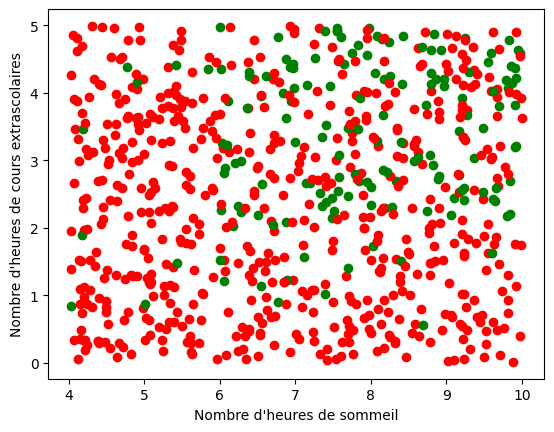

In [12]:
import matplotlib
import matplotlib.pyplot as plt
label_map = {"Fail" : 0, "Pass" : 1}
colors = ["red", "green"]
fig = plt.figure()
ax = fig.add_subplot(111)
for i, input in enumerate(inputMat):
    label = classLabelVector[i]
    index = label_map[label]
    color = colors[index]
    ax.scatter(input[1], input[2], color = color)
ax.set_xlabel("Nombre d'heures de sommeil")
ax.set_ylabel("Nombre d'heures de cours extrascolaires")
plt.show()

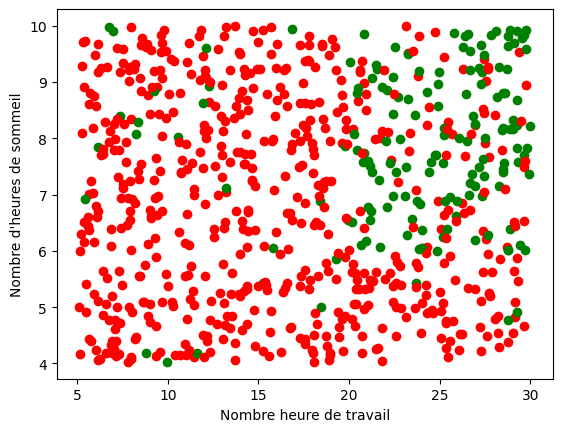

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i, input in enumerate(inputMat):
    label = classLabelVector[i]
    index = label_map[label]
    color = colors[index]
    ax.scatter(input[0], input[1], color = color)
ax.set_xlabel("Nombre heure de travail")
ax.set_ylabel("Nombre d'heures de sommeil")
plt.show()

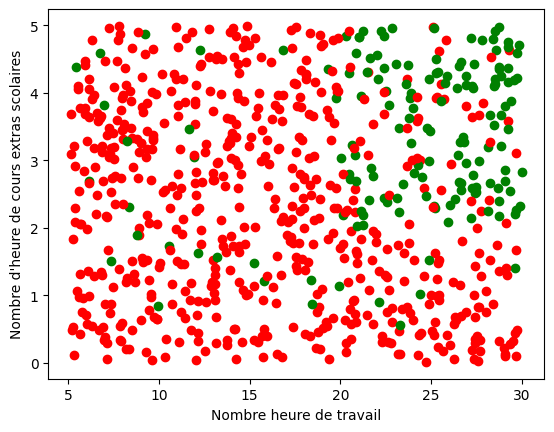

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i, input in enumerate(inputMat):
    label = classLabelVector[i]
    index = label_map[label]
    color = colors[index]
    ax.scatter(input[0], input[2], color = color)
ax.set_xlabel("Nombre heure de travail")
ax.set_ylabel("Nombre d'heure de cours extras scolaires")
plt.show()

In [14]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet/tile(ranges, (m,1))
    return normDataSet, ranges, minVals

autoNorm(inputMat)

(array([[0.3714636 , 0.11285493, 0.51838846],
        [0.95073336, 0.94010585, 0.47829326],
        [0.73083789, 0.62634448, 0.02253356],
        ...,
        [0.54138439, 0.46126906, 0.83220873],
        [0.90625346, 0.37712169, 0.59867625],
        [0.62250301, 0.86320609, 0.11226153]]),
 array([24.86640224,  5.96869022,  4.97564624]),
 array([5.1265396 , 4.02779214, 0.01609132]))

In [15]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat,datingLabels = file2matrix('dataset.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:], datingLabels[numTestVecs:m], 3)
        print(f"the classifier came back with: {classifierResult}, the real answer is: {datingLabels[i]}")
        if (classifierResult != datingLabels[i]): 
            errorCount += 1.0
    print(f"the total error rate is: {(errorCount/float(numTestVecs))}")
datingClassTest()

the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Pass, the real answer is: Pass
the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Pass, the real answer is: Pass
the classifier came back with: Pass, the real answer is: Pass
the classifier came back with: Pass, the real answer is: Pass
the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Fail, the real answer is: Fail
the clas

In [18]:
#use the sklearn KNeighborsClassifier and normlisation with StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

def datingClassTest():
    hoRatio = 0.10  # ratio test/train

    datingDataMat, datingLabels = file2matrix('dataset.txt')

    scaler = StandardScaler()
    normMat = scaler.fit_transform(datingDataMat)

    m = normMat.shape[0] # nombre de données
    numTestVecs = int(m * hoRatio)

    testX = normMat[:numTestVecs]
    testY = datingLabels[:numTestVecs]
    trainX = normMat[numTestVecs:]
    trainY = datingLabels[numTestVecs:]

    #utiliser le KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(trainX, trainY)

    #predictions
    predictions = knn.predict(testX)
    errorCount = sum(predictions != testY)

    # Afficher les résultats
    for pred, real in zip(predictions, testY):
        print(f"the classifier came back with: {pred}, the real answer is: {real}")

    print(f"the total error rate is: {errorCount / float(numTestVecs):.2f}")
    
datingClassTest()

the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Pass, the real answer is: Pass
the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Pass, the real answer is: Pass
the classifier came back with: Pass, the real answer is: Pass
the classifier came back with: Pass, the real answer is: Pass
the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Fail, the real answer is: Fail
the classifier came back with: Fail, the real answer is: Fail
the clas